# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find the best location for to opening an coffee shop business that caters to senior citizens. Specifically, this report will be targeted to stakeholders interested in opening an **Senior Citizen Coffee Shop** in **New York**, New York.

Since there are lots of coffee shops in New York City and surrounding five boroughs we will try to detect **locations that are most commonly visited with coffee shops**. We are also particularly interested in **areas with the top demographic of people who drinks coffee in the vicinity**. We would also prefer locations **as close to city center as possible**.

We will use our data science powers to generate a few most promissing business locations based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.








## Data <a name="data"></a>

#### Based on definition of our problem, factors to we will use are:

* Number of existing coffee shops in the city of any type of coffee shop
* Number of and distance to coffee shops in the city, if any
* Distance of neighborhoods from city center
* New York Senior Population, Geography of Aging, Current and Projected Numbers

#### Following data sources will be needed to extract/generate the required information:

* Number of coffee shops and their type and location in every neighborhood will be obtained using **Foursquare API**
* Demograhic of people by age group that consumes the most coffee will be obtained using **https://www.statista.com/**
* Candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Google Maps API reverse geocoding**
* Coordinate of New York center will be obtained using **Google Maps API geocoding** 
* Blue print of Growing Senior Population in New York using **https://comptroller.nyc.gov/**

## Methodology <a name="data"></a>

As a database, I used GitHub repository this study. The Data has the main components of current coffee shops, Boroughs, 
Demograhic and Population of Seniors who drink coffee, Latitude and Longitude informations of the city.

In [2]:
!pip install geopy
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests

     |████████████████████████████████| 112kB 6.1MB/s eta 0:00:01


In [42]:
CLIENT_ID = 'ORFTXVQFJON2HVOPEOJIUFO4I2ZYLHAN14OBEVDKE43LVKRI' # your Foursquare ID
CLIENT_SECRET = 'AY25JIQ5OQYJTTYGF2OHVKLTAMDFM1J1QVMKMCZVXRQ300MV' # your Foursquare Secret
VERSION = 20200604
LIMIT = 100

In [8]:
!pip install geopy

     |████████████████████████████████| 112kB 15.2MB/s eta 0:00:01


In [9]:
import geopy

In [15]:
!pip install beautifulsoup4

     |████████████████████████████████| 122kB 9.3MB/s eta 0:00:01


In [16]:
pip install lxml

     |████████████████████████████████| 5.5MB 3.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install url

     |████████████████████████████████| 143kB 6.0MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/98/c1/fe/9281ec4e03517032e1d6e51082c75ea5fa737dacba55627286
Successfully built url
Note: you may need to restart the kernel to use updated packages.


In [82]:
url = 'https://api.foursquare.com/v2/venues/search?ll=40.7,-74&client_id=ORFTXVQFJON2HVOPEOJIUFO4I2ZYLHAN14OBEVDKE43LVKRI&client_secret=AY25JIQ5OQYJTTYGF2OHVKLTAMDFM1J1QVMKMCZVXRQ300MV&query=coffee&v=20200215'
results = requests.get(url).json() 
print(results)
#COFFEE

{'meta': {'code': 200, 'requestId': '5f0f92120b8e5652321c9949'}, 'response': {'venues': [{'id': '5b5cc5e13af988002c480af0', 'name': 'Stumptown Coffee Roasters', 'location': {'address': '212 Pacific St', 'crossStreet': 'Court St', 'lat': 40.68894174493841, 'lng': -73.99214088428779, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68894174493841, 'lng': -73.99214088428779}, {'label': 'entrance', 'lat': 40.688893, 'lng': -73.992125}], 'distance': 1398, 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['212 Pacific St (Court St)', 'Brooklyn, NY 11201', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1594856501', 'hasPerk': False}, {'id': '58d933702f91cb026f478e38', 'name': 'East One Coffee

I utilized the Foursquare API to explore the all coffee shops in New York and boroughs and segment them with the limit as 30 venues.
Here is a head of the list Venues name, street , latitude and longitude informations from Forsquare API.

In [1]:
import pandas as pd
df_ppd = pd.read_csv("convertcsv.csv")


In [4]:
df_ppd.head(5)

,id,name,location/address,location/crossStreet,location/lat,location/lng,location/labeledLatLngs/0/label,location/labeledLatLngs/0/lat,location/labeledLatLngs/0/lng,location/labeledLatLngs/1/label,...,hasPerk,location/neighborhood,delivery/id,delivery/url,delivery/provider/name,delivery/provider/icon/prefix,delivery/provider/icon/sizes/0,delivery/provider/icon/sizes/1,delivery/provider/icon/name,venuePage/id
0,5b5cc5e13af988002c480af0,Stumptown Coffee Roasters,212 Pacific St,Court St,40.688942,-73.992141,display,40.688942,-73.992141,entrance,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58d933702f91cb026f478e38,East One Coffee Roasters,384 Court St,at Carroll St,40.681128,-73.996526,display,40.681128,-73.996526,NaN,...,False,Carroll Gardens,1153265.0,https://www.seamless.com/menu/east-one-coffee-...,seamless,https://fastly.4sqi.net/img/general/cap/,40.0,50.0,/delivery_provider_seamless_20180129.png,NaN
2,4b294d4ff964a520939c24e3,NYC Love Street Coffee,NaN,NaN,40.706538,-74.009628,display,40.706538,-74.009628,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53723e71498e7892c5155c07,Gregorys Coffee,80 Broad St,btwn Beaver & S William St,40.704341,-74.011857,display,40.704341,-74.011857,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435466272.0
4,53206275498eaacdaca9b857,Gregorys Coffee,100 Wall St,at Front St,40.705200,-74.007090,display,40.705200,-74.007090,NaN,...,False,NaN,1043124.0,https://www.seamless.com/menu/gregorys-coffee-...,seamless,https://fastly.4sqi.net/img/general/cap/,40.0,50.0,/delivery_provider_seamless_20180129.png,NaN


In [5]:
import pandas as pd 
df = pd.read_csv('convertcsv.csv')
final_df = df[['name','location/address','location/lat','location/lng']]
final_df.head(30)

,name,location/address,location/lat,location/lng
0,Stumptown Coffee Roasters,212 Pacific St,40.688942,-73.992141
1,East One Coffee Roasters,384 Court St,40.681128,-73.996526
2,NYC Love Street Coffee,NaN,40.706538,-74.009628
3,Gregorys Coffee,80 Broad St,40.704341,-74.011857
4,Gregorys Coffee,100 Wall St,40.705200,-74.007090
5,Coffee Project NY,78 Rockwell Pl,40.687751,-73.979387
6,Gregorys Coffee,42 Broadway,40.706110,-74.012850
7,For Five Coffee Roasters,1 Liberty Plz,40.709554,-74.010576
8,Periscope Coffee On John Street,158 John Street,40.706390,-74.004480
9,For Five Coffee Roasters,NaN,40.712240,-74.014915


In [7]:
!pip install matplotlib

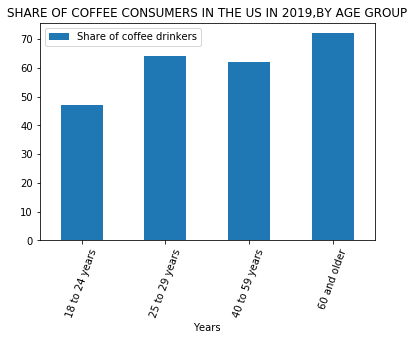

In [8]:

import pandas as pd

import matplotlib.pyplot as plot
# A python dictionary

data = {"Years":["18 to 24 years", "25 to 29 years", "40 to 59 years", '60 and older'],

        "Share of coffee drinkers":[47,64,62,72]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.bar(x="Years", y="Share of coffee drinkers", rot=70, title="SHARE OF COFFEE CONSUMERS IN THE US IN 2019,BY AGE GROUP");

plot.show(block=True);



We use matpot to generate a Bar chart showing the demogrhapic of coffee drinkers by age group provided by Statista

The Geography of Ney York City seniors that live in all corners of the five boroughs provided by Comptroller.NYC.Gov

In [4]:
import pandas as pd
df_geo = pd.read_csv("GEO_OF_AGING.csv")
pd = df_geo
df_geo.head()

,BOROUGH,TOTAL 65+,TOTAL POPULATION (2019),PERCENT 65+,LOCATION/LAT,LOCATION/LNG
0,BROOKLYN,"326,955","2,636,735",12.40%,40.678178,-73.944158
1,QUEENS,"322,803","2,339,150",13.80%,40.728224,-73.794852
2,MANHATTAN,"240,100","1,644,518",14.60%,40.783060,-73.971249
3,BRONX,"165,921","1,455,444",11.40%,40.844782,-73.864827
4,STATEN ISLAND,"71,184","474,558",15.00%,40.579532,-74.150201


# ANALYSIS

## Let's perform some basic explanatory data analysis and derive some informative info from our raw data collected.

We then use python folium library to visualize geographic details of seniors 65+ of the surrounding Boroughs 

In [2]:
!pip install folium
import folium
map = folium.Map(location=[40.693943, -73.985880])

map

folium.Marker(
    location=[40.693943, -73.985880],
    popup='Welcome to <b>NEW YORK CITY</b>',
).add_to(map)

folium.Marker(
    location=[40.678178, -73.944158],
    popup='326,955 Senior Population <b>brooklyn</b>',
).add_to(map)

folium.Marker(
    location=[40.728224, -73.794852],
    popup='322,803 Senior Population <b>queens</b>',
).add_to(map)

folium.Marker(
    location=[40.78306, -73.971249],
    popup='240,100 Senior Population <b>manhattan</b>',
).add_to(map)

folium.Marker(
    location=[40.844782, -73.864827],
    popup='165,921 Senior Population <b>bronx</b>',
).add_to(map)

folium.Marker(
    location=[40.579532, -74.150201],
    popup='71,184 Senior Population <b>staten island</b>',
).add_to(map)

map

     |████████████████████████████████| 102kB 8.4MB/s ta 0:00:011


# RESULTS AND DISCUSSION

### Our analysis shows although there is a great number of Coffee shops in the New York and surrounding boroughs area of interest, there are high pockets of Coffee shopsDensity fairly close to the New York city center. The highest concentration of Coffee shops was detected in New York city and North in Manhattan.  So we will focused our analysisto the areas of the South  corresponding with the Staten Island Borough.  Directing our attention to this more narrow area of interest we created a dense grid of location, theCandidate of location has a dense population of seniors and with 2 or less coffee shops in this zone area. The even though this zone is the less populated of demographic of Seniors upon our Analysis, the results show this is the  ideal candidate location for senior coffee shop would be in city of Richmond Town which is center of Staten Island.


# CONCLUSION

### The purpose of this was to identify coffee shops close to center with the most populated seniors that drink coffee neighborhoods/boroughs surrounding newYork city in order to aid stakeholders in narrowing down the search for optimal location for a new senior coffee shop.  By calculating coffee shop density distributionFrom **Foursqaure** data and **Folium Library** we have first identified general boroughs that justify further analysis and then generated extensive collection locations to satisfy some basic requirements.Final decision on optimal coffee shops will be made by stakeholders based on specific characteristics of neighborhoods and locations.
